In [1]:
# Fetching the data
import os 
import tarfile
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# Load in the data as a pandas dataframe
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

# DATA EXPLORATION

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


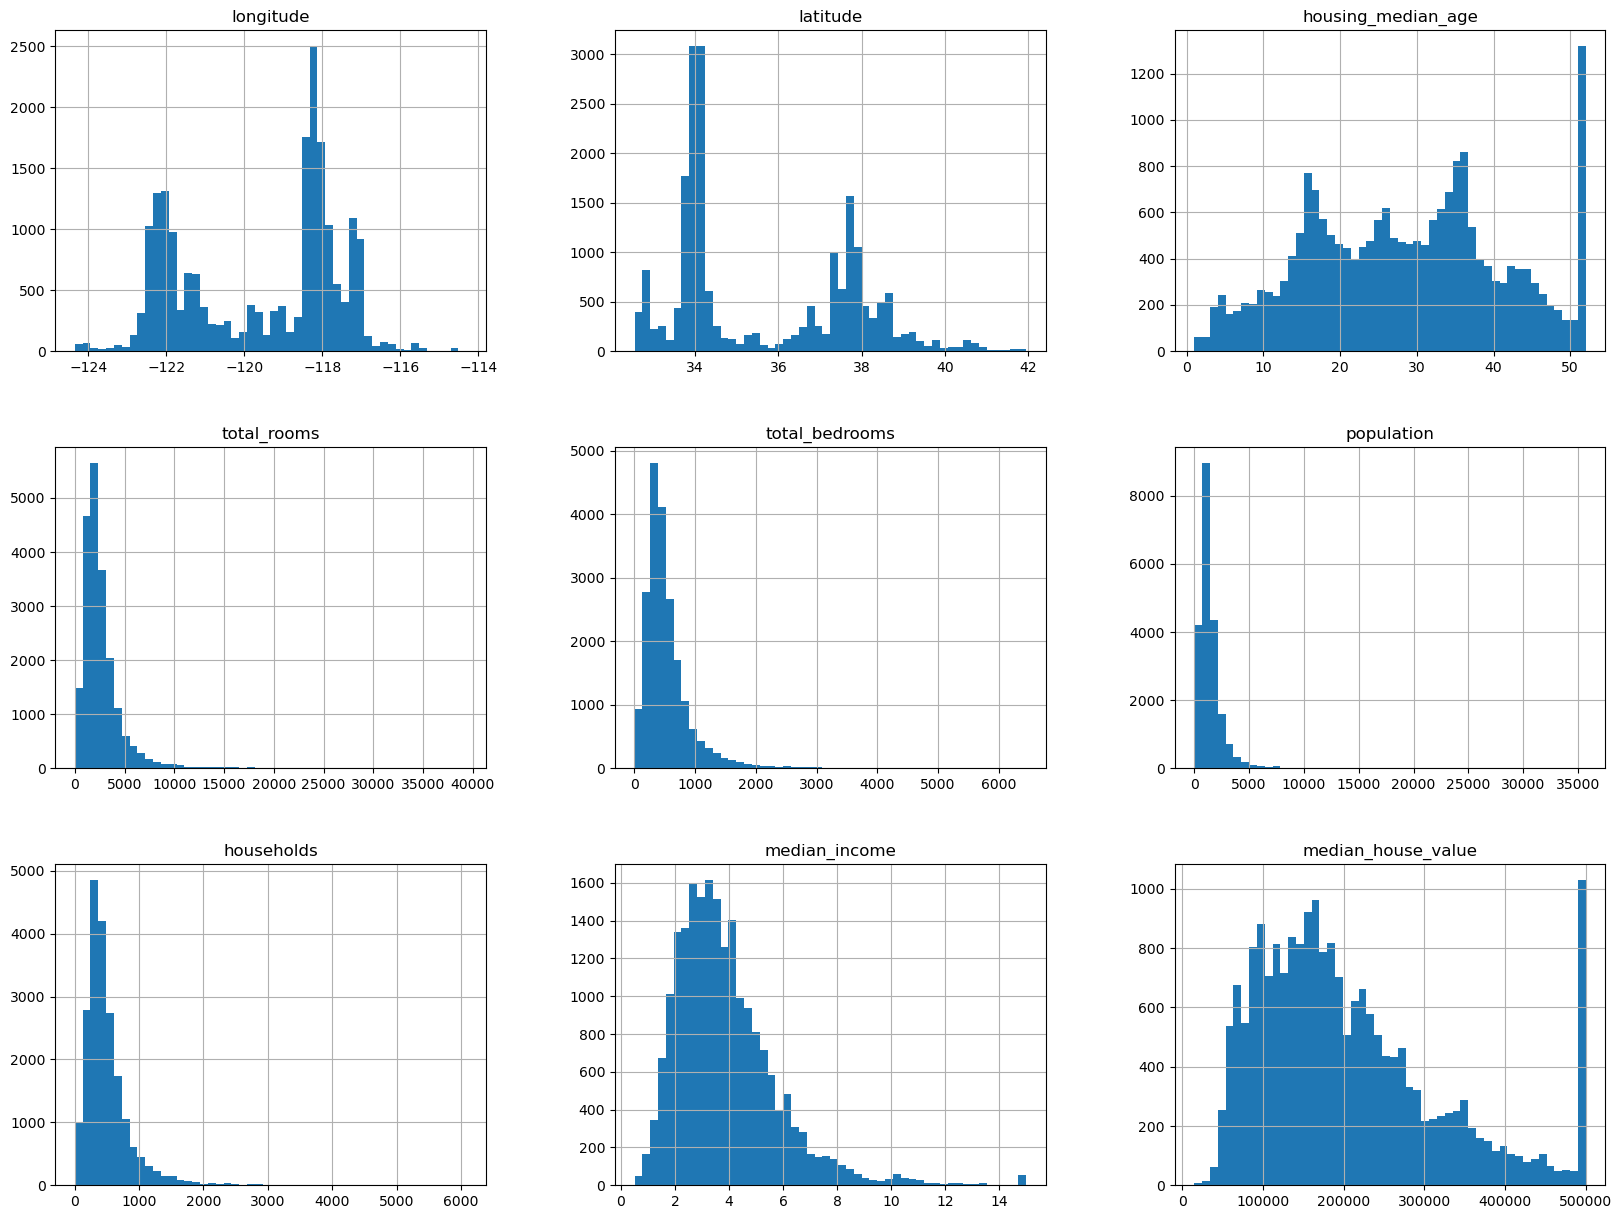

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Split training and test data

In [9]:
import random
 
def split_data(random_seed: int, data: list, test_size: float):

    """
    Randomly shuffles and splits up a pandas dataframe into a test and training split

    Parameters:
    random_seed - An integer to be able to shuffle and split the data consistenly
    data - A pandas dataframe of your.....data
    test_size - A floating point value of the size you wish your test size to be

    Returns:
    train_set - The set of data from the dataframe for training your model on
    test_set - The set of data from the dataframe for testing you model on
    """

    # Generate a random seed
    random.seed(random_seed)

    # Create a copy of the dataframe and wipeout the current indexes, then create a list of indexes
    # to be shuffled
    shuffle_data = data.reset_index(drop=True)
    shuffled_data = list(shuffle_data.index)
    
    random.shuffle(shuffled_data)

    # Calculate your test size 
    test_samples: int = int(len(shuffle_data) * test_size)

    # Split the data
    train_set = shuffled_data[test_samples:]
    test_set = shuffled_data[:test_samples]

    # Reassign each instance to their resepctive set
    train_set = shuffle_data.loc[train_set].reset_index(drop=True)
    test_set = shuffle_data.loc[test_set].reset_index(drop=True)

    # Let em know dawg
    print(f"Train size: {len(train_set)}, Test size: {len(test_set)}")

    return (train_set, test_set)

train, test = split_data(42, housing, 0.2)

Train size: 16512, Test size: 4128


In [10]:
housing = train.copy()

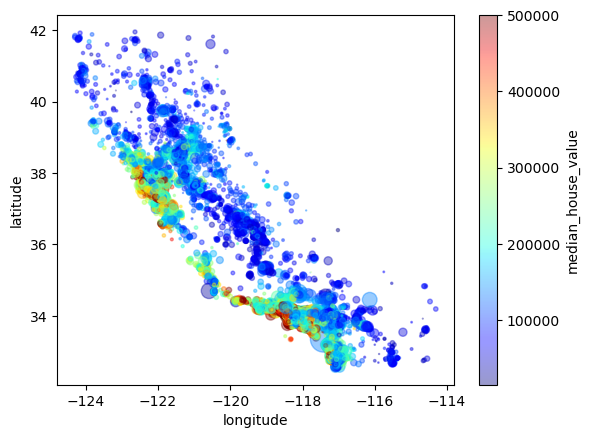

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, 
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

In [12]:
# Look for correlations

housing_no_cat = housing.drop("ocean_proximity", axis=1)

corr_matrix = housing_no_cat.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686756
total_rooms           0.133400
housing_median_age    0.106943
households            0.062941
total_bedrooms        0.047899
population           -0.026532
longitude            -0.048613
latitude             -0.140853
Name: median_house_value, dtype: float64

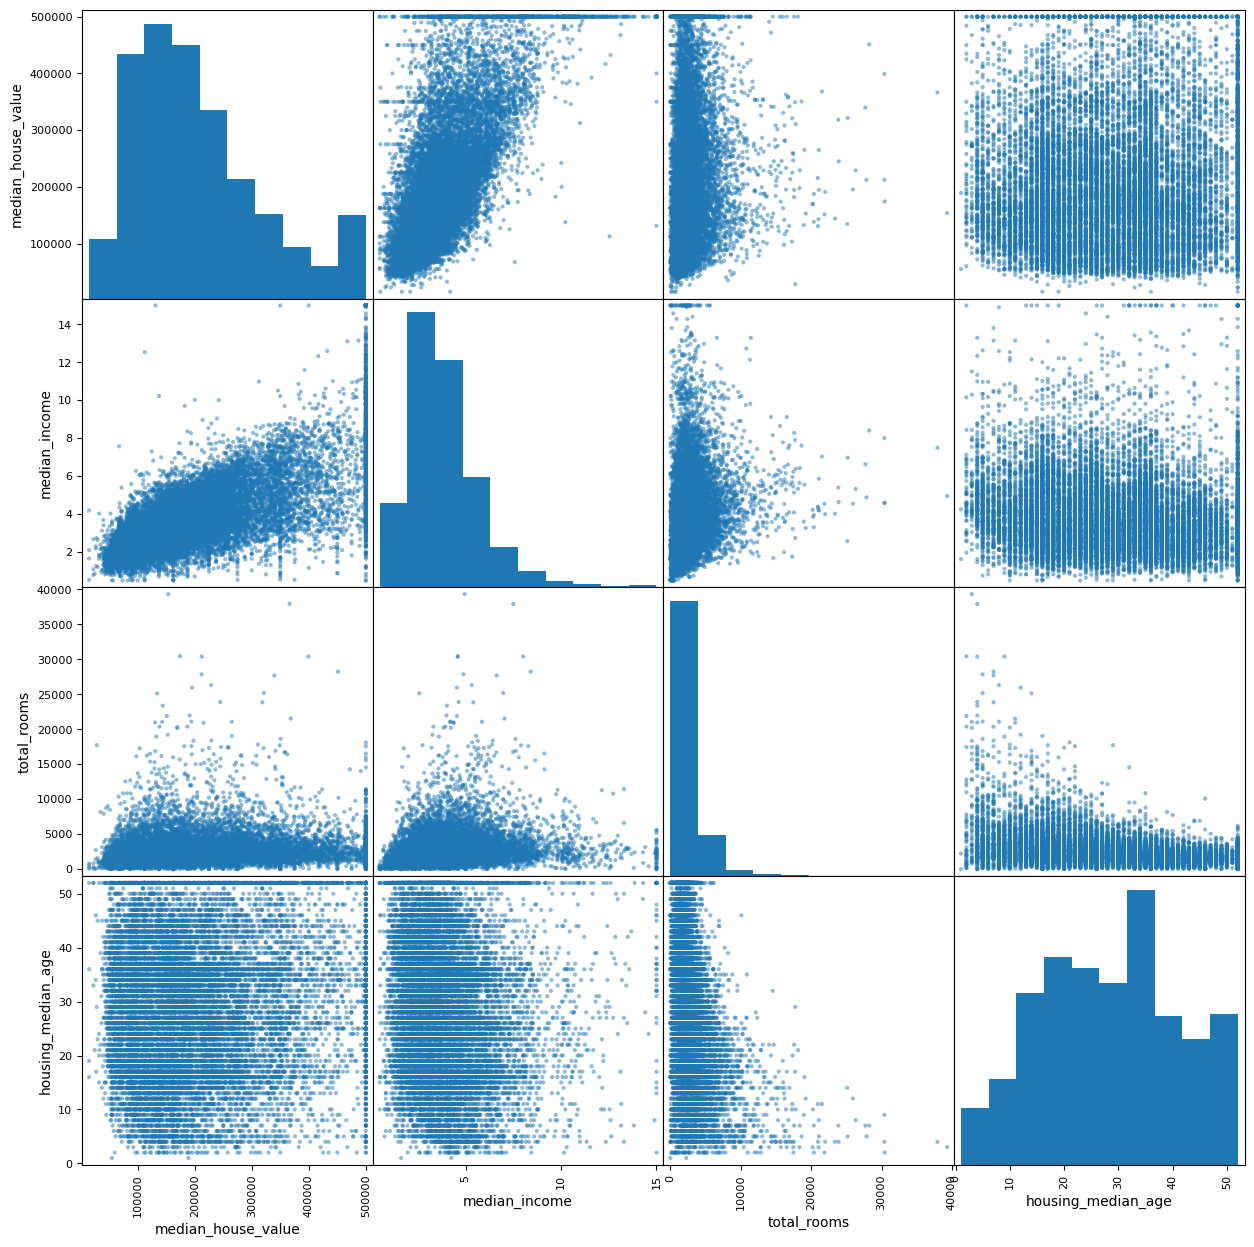

In [13]:
# Visualise the correlations

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_no_cat[attributes], figsize=(15,15))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

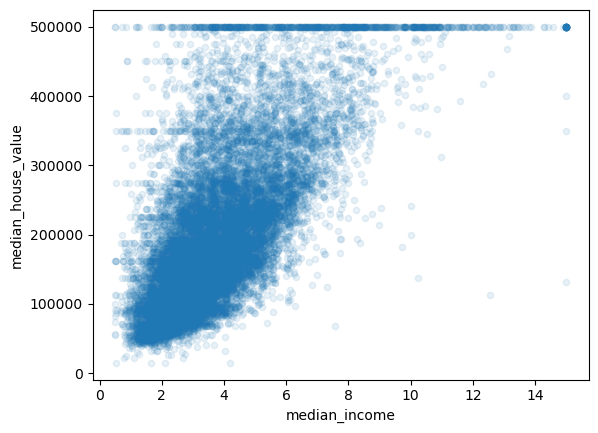

In [14]:
# Hone in on our pray

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# Engineering new features


In [15]:
rooms = housing["total_rooms"]
bedrooms = housing["total_bedrooms"]
population = housing["population"]
households = housing["households"]

housing["rooms_per_household"] = rooms / households
housing["bedrooms_per_room"] = bedrooms / rooms
housing["population_per_household"] = population / households

housing_no_cat = housing.drop("ocean_proximity", axis=1)


corr_matrix = housing_no_cat.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.686756
rooms_per_household         0.159434
total_rooms                 0.133400
housing_median_age          0.106943
households                  0.062941
total_bedrooms              0.047899
population_per_household   -0.020105
population                 -0.026532
longitude                  -0.048613
latitude                   -0.140853
bedrooms_per_room          -0.255086
Name: median_house_value, dtype: float64

# Data Cleaning


In [16]:
housing = train.drop("median_house_value", axis=1)
housing_labels = train["median_house_value"].copy()

x_test = test.drop("median_house_value", axis=1)
y_test = test["median_house_value"].copy()

In [17]:
# Going to replace missing values with the median using an imputer cause i normally dont do that
# tho actually i like to stay away from using libs if i can and imputer is an sklearn lib...hmmm
# I have an idea... actually no, to much time at ..... wait

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

x_test["total_bedrooms"].fillna(median, inplace=True)

In [18]:
housing_cat = housing[["ocean_proximity"]]

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing = housing.drop("ocean_proximity", axis=1)
x_test  = x_test.drop("ocean_proximity", axis=1)
# housing["ocean_proximity"] = housing_cat_1hot

In [19]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [20]:

scaler = StandardScaler()
scaler.fit_transform(housing)
scaler.transform(x_test)

array([[-1.21666186,  1.13227634, -1.95730714, ..., -0.17116204,
        -0.18218655,  1.13558372],
       [-1.22664282,  0.80805446,  0.10935734, ..., -0.8528307 ,
        -0.90026904,  1.34837431],
       [ 0.82444335, -0.72847535,  0.58627991, ..., -0.48004315,
        -0.61303604,  0.63576719],
       ...,
       [ 0.98413863, -0.94462328, -2.03679424, ..., -0.38773385,
        -0.28924612,  3.25200011],
       [ 0.70966237, -0.73787309, -0.28807814, ...,  1.45046381,
         1.55426747, -0.24451219],
       [ 0.50006233, -0.65329346,  0.58627991, ..., -0.16494891,
        -0.12212874,  0.42838031]])

In [21]:
# Fit the model

lin_reg = LinearRegression()
lin_reg.fit(housing, housing_labels)

LinearRegression()

In [22]:
# Lets make some predictions using our data
examples = housing.iloc[:5]
example_labels = housing_labels.iloc[:5]

model_predictions = lin_reg.predict(examples)

for x, y in zip(model_predictions, example_labels):
    print(f"Models prediction: {x}\t, Actual house value: {y}\t Difference of: {round((x - y) / y * 100, 2)}%")

Models prediction: 23602.117927020416	, Actual house value: 100000.0	 Difference of: -76.4%
Models prediction: 372909.7134381258	, Actual house value: 397700.0	 Difference of: -6.23%
Models prediction: -38719.437205485534	, Actual house value: 44000.0	 Difference of: -188.0%
Models prediction: 385930.6937338989	, Actual house value: 500001.0	 Difference of: -22.81%
Models prediction: 305624.2150961254	, Actual house value: 300900.0	 Difference of: 1.57%


In [23]:
# Calculste the rootmeansquarederror

housing_predictions = lin_reg.predict(housing)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse**0.5 # Root it dawg... me style

69693.03940295523

In [24]:
# apparently this means underfitting so we are going to juice up with a stronger model.....
# I dont understand why this is underfitting btw and ive already gotten a hd in this course

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing, housing_labels)


DecisionTreeRegressor()

In [25]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse**0.5

0.0

In [26]:
# Cross val since 0.0 aight right

from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(tree_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)

tree_rmse = np.sqrt(-scores)
tree_rmse_mean = tree_rmse.mean()
tree_rmse_mean

69316.63502842141

In [27]:
# Cross val the lin_reg model

scores = cross_val_score(lin_reg, housing, housing_labels, scoring="neg_mean_squared_error", cv=10)

lin_rmse = np.sqrt(-scores)
lin_rmse_mean = lin_rmse.mean()
lin_rmse_mean

69876.47172415597

In [28]:
# So a little explaination here
# The score on the lin_reg on the training set is about the same as the cross val set, meaning its not overfitting
# Where as with the decisiontree, it is 0 on the training and 69k on the cross val which means overfitting the training
# hence why it scores so high on it and not the cross val.


# The book goes into using more advanced models here as examples to show you whats to come... im not going to do them
# ill get there in later chapters, also goes on about hyperparam tuning, ill do that later, i do have to rememeber to 
# use randomize search method of hyperparams tho.... havent done that before... 1000s of combos... blow up my computer... yesss

# onto the test set

final_pred = lin_reg.predict(x_test)
final_mse = mean_squared_error(y_test, final_pred)
final_mse**0.5

69562.554059522

In [34]:
from sklearn.svm import SVR

vector_machine = SVR(kernel="rbf")

vector_machine.fit(housing, housing_labels)

SVR()

In [35]:
y_pred = vector_machine.predict(housing)
mse = mean_squared_error(housing_labels, y_pred)
rmse = mse**0.5

In [36]:
rmse

118779.40691051954

In [37]:
# SVM with a linear kernel is terribly worse, with radial something blurr its.... waiting for training....even more worserer